### Ensemble Learning

- Train different models on the same dataset
- let each model make its predictions
- aggregate the predictions of individual models
- and the final prediction then is considered more robust and less prone to errors

Example diagram
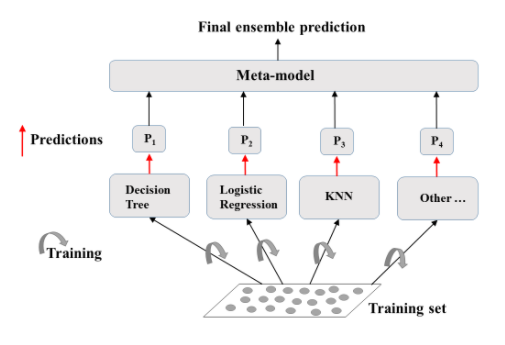

### Performing Ensembling with VotingClassifier

In [ ]:
#importing models and meta-model Voting Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import train_test_split
from skelearn.metrics import accuracy_score

#set seed
SEED = 1

#split the dataset into train/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=SEED)

#instantiate models
lr = LogisticRegression(random_state=SEED)
knn = KNN()  #can also set neightbors knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(random_state=SEED)

#define the list of classififers that contain tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbours', knn),
              ('Classification Tree', dt)]


#a for loop to iterate over defined classifiers tuples list
#to fit each model to:
    #a) fit to the training split
    #b) to predict the labels on the test split features
    #c) print the evaluation on accuracy for each model on test split features
#this way it can all be done at once through a for loop

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

#instantiating the VotingClassifier
#also making use of the classifier tuples list, here:
vc = VotingClassifier(estimators=classifiers)

#fitting and predicting with vc
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

#printing evaluation of accuracy on test-set
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

#### Voting Classifier vs. Bagging

VotingClassifier:
- same training set BUT *different algorithms*

Bagging:  "Boostrap Aggregation"
- ONE Algorithm, but **different subsets of the training set**

### Performing Ensembling with Bagging

Example diagram
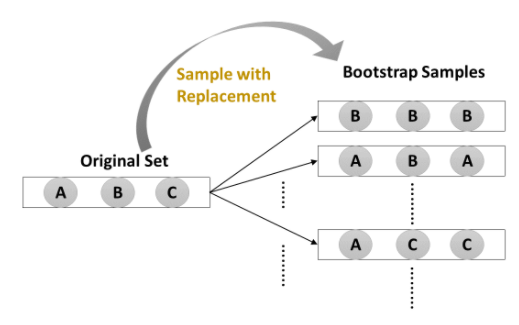

##### Bagging Classification & Regression

Classification:
- aggregate predictions by majority voting via BaggingClassifier

Regression:
- aggregate prediction through averaging via BaggingRegressor

In [ ]:
#import modules
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 1

#split the dataset into train/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                   random_state=SEED)
#instantiate models
dt = DecisionTreeClassifier(max_depth=4,
                           min_sampes_leaf=0.16,
                           random_state=SEED)

bc = BaggingClassifier(base_estimator=dt, #incorporating DecisionTreeClassifier into BC
                      n_estimators=300, #the number of trees
                      n_jobs= -1)

#fit and predict using bc
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

#evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

#### Out-of-Bag (OOB) Evaluation

About Bagging:
- some instances may be sampled several times for one model
- other instances may not be sampled at all
- on average for each model it is said 63% of the training instances are sampled

The remaining **37% constitute the OOB instances**

### Performing OOB Evaluation

In [ ]:
#mostly similar to the code above, watch for "new" statements
#import modules
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 1

#split the dataset into train/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                   random_state=SEED)

#instantiate the DT classifier
dt = DecisionTreeClassifier(max_depth=4,
                           min_sampes_leaf=0.16,
                           random_state=SEED)

#--------------same as above----------------------------------------

#new-----
#instantiate the BC with the oob_score set to True
bc = BaggingClassifier(base_estimator=dt, 
                      n_estimators=300,
                       oob_score=True  #<<this is now new
                       #in order to evaluate the OOB accuray of bc after trainning (classifiers)
                       #and the oob score for the r-squared score for regressors
                      n_jobs= -1)

#--------------------now more of the same again----------------------
#fit and predict using bc
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

#evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

#-----new
#and now extrating the OOB accuracy
oob_accuracy = bc.oob_score_
print('OOB Accuracy: {:.3f}'.format(oob_accuracy))

### Ensembling with Random Forest

- Base estimator is a Decision Tree
- Each estimator is train on a different bootstrap sample having the same size as the training set.
- Introduces further randomization in the training of individual trees

Classification
- aggregates prediction by majority voting via **RandomForestClassifier**

Regression
- Aggregates predictions through averaging via **RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                   random_state=SEED)

rf = RandomForestRegressor(n_estimators=400,
                       min_samples_leaf=0.12,
                      n_jobs= -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse_rf = MSE(y_test, y_pred)
print('test set RMSE of rf: {:.2f}'.format(rmse_test))

rmse_dtr = mse_dtr**(1/2)

note: *there is an aspect of feature_importance_ that can be extracted from tree-based models. This is covered and touched on more deeply in the Feature-Engineering REPO.*